In [1]:

import pandas as pd 

This project aims to analyze the quantitative structure-activity relationship to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals using K-Nearest Neighbor (kNN).

The dataset consists of six molecular descriptor as features and their corresponding LC50 values, which are:

| Feature   | Description |
| ----------| ------------------------------------------------------------ |
| CIC0      | Set of indices of neighbourhood symmetry                     |
| SM1_Dz(Z) | Set of descriptors calculated from 2D matrices derived from the molecular graph (2D matrix-based descriptors) |
| GATS1i    | 2D Geary autocorrelation descriptor                              |
| NdsCH     | count the number of unsaturated sp2 carbon atoms of the type =CH-|
| NdssC     | Count the number of unsaturated sp2 carbon atoms of the type =C  |
| MLOGP     | The octanol-water partitioning coefficient (log P) calculated by means of the Moriguchi model |


Dataset source : https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity

In [2]:

df=pd.read_csv('data/qsar_fish_toxicity.csv')

In [3]:
df.head()


,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [4]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [5]:
df.shape

(908, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CIC0                908 non-null    float64
 1   SM1_Dz(Z)           908 non-null    float64
 2   GATS1i              908 non-null    float64
 3   NdsCH               908 non-null    int64  
 4   NdssC               908 non-null    int64  
 5   MLOGP               908 non-null    float64
 6   LC50 [-LOG(mol/L)]  908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [7]:
df.isnull().sum()

CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64

In [8]:
df['NdsCH'].value_counts()

NdsCH
0    760
1    107
2     29
4      7
3      5
Name: count, dtype: int64

In [9]:
df['NdssC'].value_counts()

NdssC
0    622
1    176
2     81
3     18
4      8
6      2
5      1
Name: count, dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

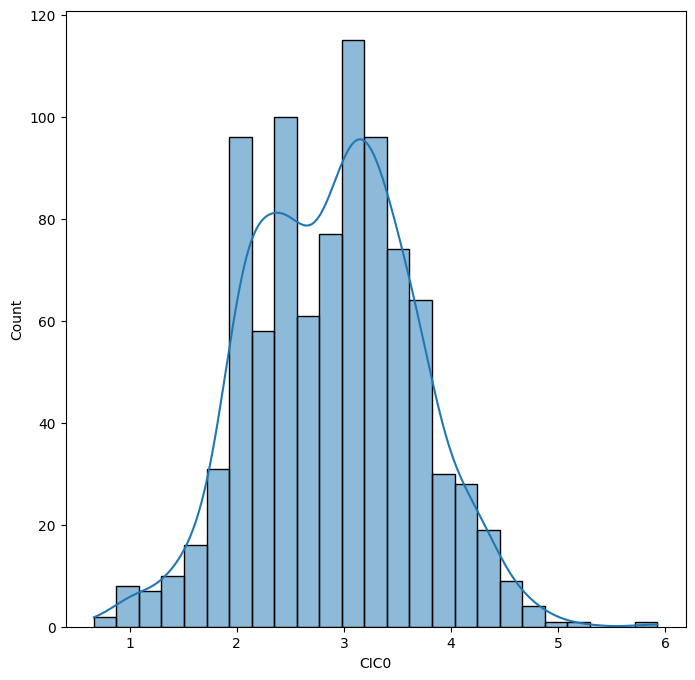

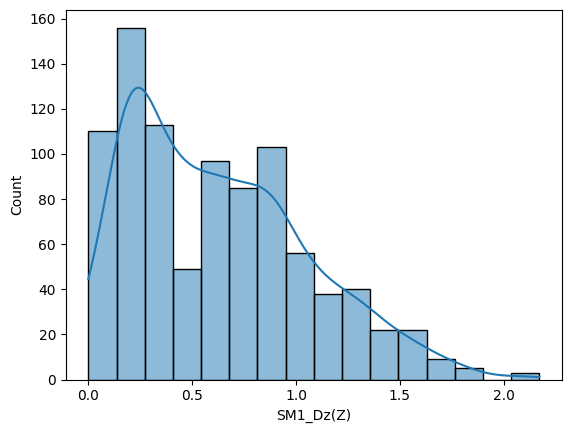

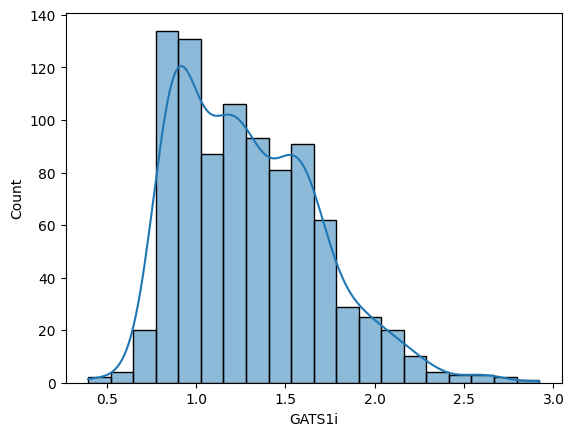

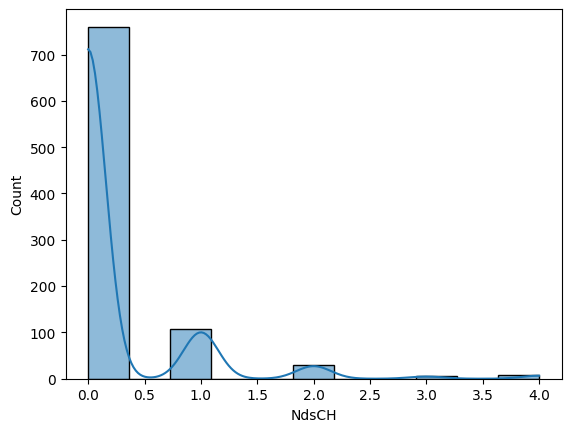

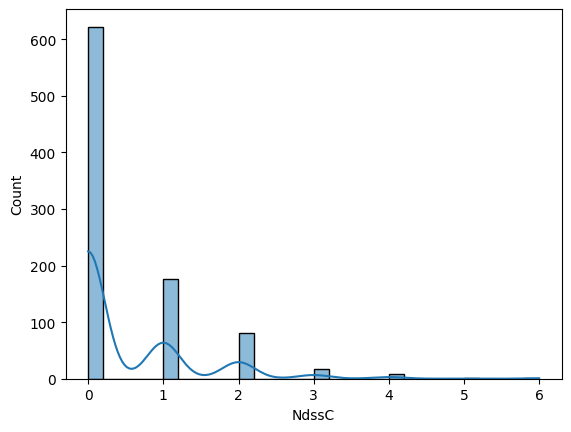

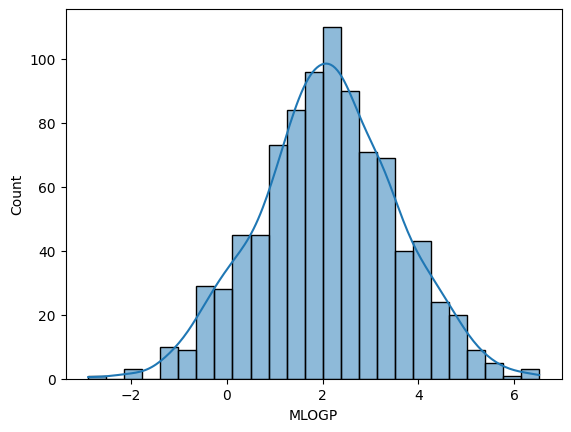

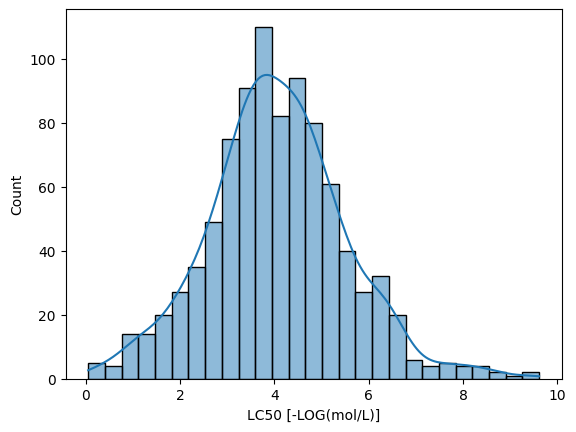

In [11]:
plt.figure(figsize=(8,8))
x=0
for i in df.columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [12]:
df.corr(method="pearson")

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
CIC0,1.000000,-0.235360,0.147622,0.121341,0.246639,0.463867,0.291854
SM1_Dz(Z),-0.235360,1.000000,-0.145967,-0.141401,0.163179,0.200663,0.410893
GATS1i,0.147622,-0.145967,1.000000,-0.010657,0.092410,-0.450739,-0.397965
NdsCH,0.121341,-0.141401,-0.010657,1.000000,0.188164,0.048620,0.172004
NdssC,0.246639,0.163179,0.092410,0.188164,1.000000,0.028499,0.172390
MLOGP,0.463867,0.200663,-0.450739,0.048620,0.028499,1.000000,0.651664
LC50 [-LOG(mol/L)],0.291854,0.410893,-0.397965,0.172004,0.172390,0.651664,1.000000


MLOGP has the highest correlation of 0.652 and GATS1i has the lowest correlation of -0.398

In [13]:
X = df.drop(labels=['LC50 [-LOG(mol/L)]'],axis=1)
y = df[['LC50 [-LOG(mol/L)]']]

In [14]:
y

,LC50 [-LOG(mol/L)]
0,3.770
1,3.115
2,3.531
3,3.510
4,5.390
...,...
903,3.109
904,4.040
905,4.818
906,5.317


In [15]:
X

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP
0,3.260,0.829,1.676,0,1,1.453
1,2.189,0.580,0.863,0,0,1.348
2,2.125,0.638,0.831,0,0,1.348
3,3.027,0.331,1.472,1,0,1.807
4,2.094,0.827,0.860,0,0,1.886
...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736
904,3.652,0.872,0.867,2,3,3.983
905,3.763,0.916,0.878,0,6,2.918
906,2.831,1.393,1.077,0,1,0.906


In [16]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [18]:
scaler = StandardScaler()


In [19]:

## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

NameError: name 'SimpleImputer' is not defined

In [20]:
knn_result = []

for k in range (2, 10):
    clf = Pipeline([
        ("scaler", scaler),
        ("knn", KNeighborsRegressor(n_neighbors=k))
        ])
    clf.fit(X_train, y_train)
    cross_val = cross_val_score(clf, X, y, cv=10)
    cross_val_avg = cross_val.mean()
    knn_result.append(cross_val_avg)
    print(f"R-Squared for k = {k} : {cross_val_avg:.3f}")

R-Squared for k = 2 : 0.500
R-Squared for k = 3 : 0.548
R-Squared for k = 4 : 0.575
R-Squared for k = 5 : 0.588
R-Squared for k = 6 : 0.582
R-Squared for k = 7 : 0.586
R-Squared for k = 8 : 0.591
R-Squared for k = 9 : 0.590


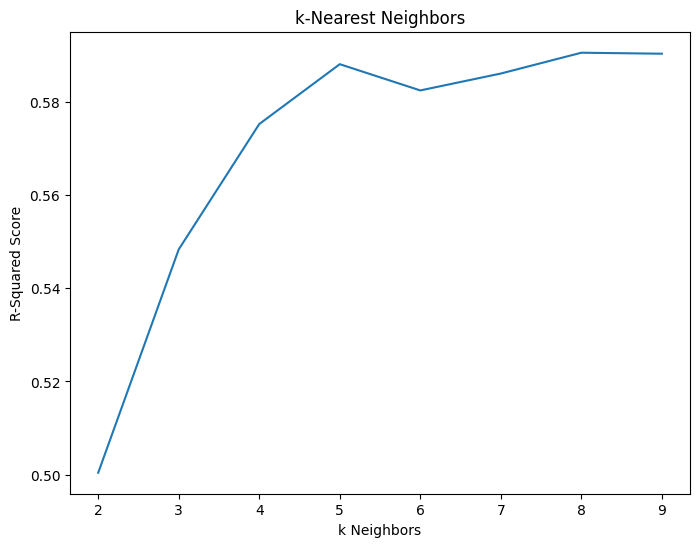

In [21]:
plt.figure(figsize=(8,6))
plt.plot([i for i in range(2, 10)], knn_result)
plt.xlabel("k Neighbors")
plt.ylabel("R-Squared Score")
plt.title("k-Nearest Neighbors")
plt.show()

In [24]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train,y_train)
knn_training_pred = knn.predict(X_train)
knn_training_rsq = knn.score(X_train, y_train)
knn_training_rmse = np.sqrt(mean_squared_error(y_train, knn_training_pred))

print(f"R-Squared for the training set : {knn_training_rsq:.3f}")
print(f"RMSE for the training set : {knn_training_rmse:.3f}")

R-Squared for the training set : 0.660
RMSE for the training set : 0.862


In [23]:
import numpy as np


In [25]:
knn_testing_pred = knn.predict(X_test)
knn_testing_rsq = knn.score(X_test, y_test)
knn_testing_rmse = np.sqrt(mean_squared_error(y_test, knn_testing_pred))

print(f"R-Squared for the testing set : {knn_testing_rsq:.3f}")
print(f"RMSE for the testing set : {knn_testing_rmse:.3f}")


R-Squared for the testing set : 0.601
RMSE for the testing set : 0.881


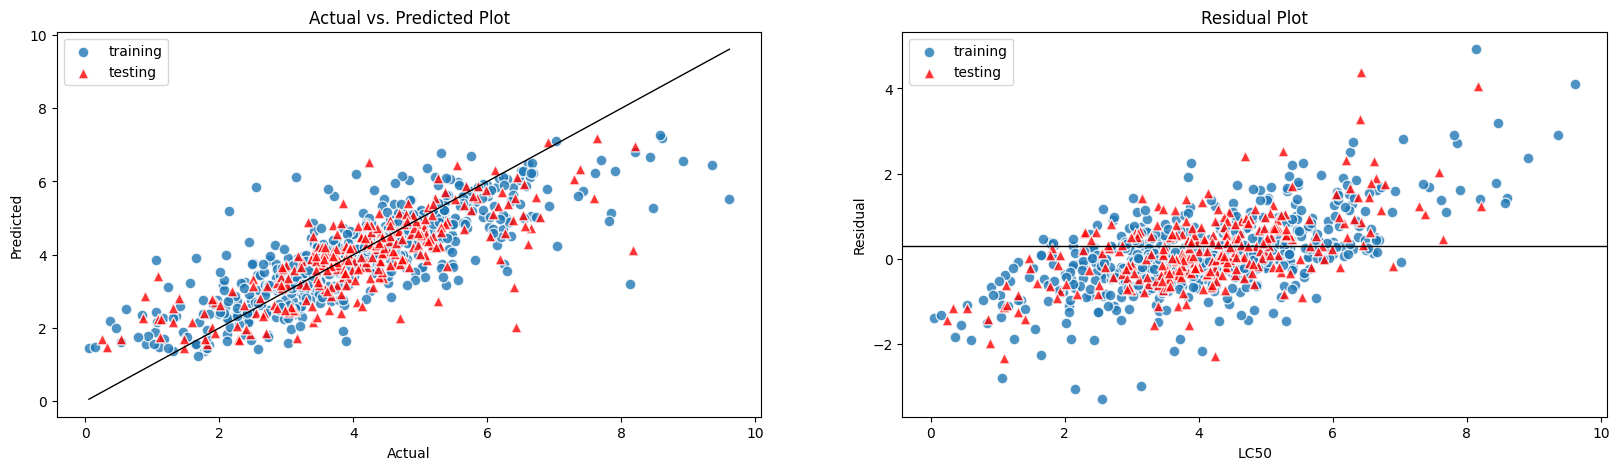

In [26]:
residual_train = y_train - knn_training_pred
residual_test = y_test - knn_testing_pred

fig=plt.figure(figsize=(20,5))

ax1=plt.subplot(1,2,1)
ax1.scatter(y_train, knn_training_pred, s=60, alpha=0.8, edgecolor="white", label="training")
ax1.scatter(y_test, knn_testing_pred, marker="^", s=60, c="r", alpha=0.8, edgecolor="white", label="testing")
ax1.plot([y.min(), y.max()], [y.min(), y.max()], "k", lw=1)
ax1.set_title("Actual vs. Predicted Plot")
ax1.set_xlabel("Actual")
ax1.set_ylabel("Predicted")
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.scatter(y_train, residual_train, s=60, edgecolor="white", alpha=0.8, label="training")
ax2.scatter(y_test, residual_test, marker="^", s=60, c="r", edgecolor="white", alpha=0.8, label="testing")
ax2.axhline(y=0.3, linewidth= 1, linestyle="-", c="black")
ax2.legend()
ax2.set_title("Residual Plot")
ax2.set_xlabel("LC50")
ax2.set_ylabel("Residual")

plt.show()

In [32]:
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]
)
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
])

In [33]:
numerical_cols = X.select_dtypes(exclude='object').columns

In [34]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [78]:

from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.preprocessing import MinMaxScaler
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [36]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [37]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [38]:
regression.coef_

array([[ 0.32202437,  0.55615277, -0.27926388,  0.24656122,  0.04208404,
         0.54991176]])

In [39]:
regression.intercept_

array([4.04406457])

In [40]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [41]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 0.8458321632330441
MAE: 0.6288204862234533
R2 score 63.2304617628032


Lasso
Model Training Performance
RMSE: 1.396534214658578
MAE: 1.0556462230682704
R2 score -0.23581954185190046


Ridge
Model Training Performance
RMSE: 0.8457699434032642
MAE: 0.6287367077516812
R2 score 63.23587113445873


Elasticnet
Model Training Performance
RMSE: 1.2076321105494536
MAE: 0.8997890137514591
R2 score 25.046988024811622




In [42]:
model_list

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet']

In [54]:
pd.DataFrame(scaler.fit_transform(df[['CIC0','SM1_Dz(Z)','GATS1i']]),columns=['CIC0','SM1_Dz(Z)','GATS1i'])

,CIC0,SM1_Dz(Z),GATS1i
0,0.478873,0.468288,0.970369
1,-0.938408,-0.113184,-1.092634
2,-1.023101,0.022259,-1.173835
3,0.170538,-0.694657,0.452715
4,-1.064124,0.463618,-1.100247
...,...,...,...
903,-0.128533,0.232430,2.366006
904,0.997617,0.568703,-1.082484
905,1.144506,0.671454,-1.054572
906,-0.088833,1.785359,-0.549605


In [55]:
new_df=df

In [81]:
min_max=MinMaxScaler()
new_df['MLOGP']=min_max.fit_transform(df[['MLOGP']])

In [82]:
new_df['CIC0']=pd.DataFrame(scaler.fit_transform(df[['CIC0']]))
new_df['SM1_Dz(Z)']=pd.DataFrame(scaler.fit_transform(df[['SM1_Dz(Z)']]))
new_df['GATS1i']=pd.DataFrame(scaler.fit_transform(df[['GATS1i']]))


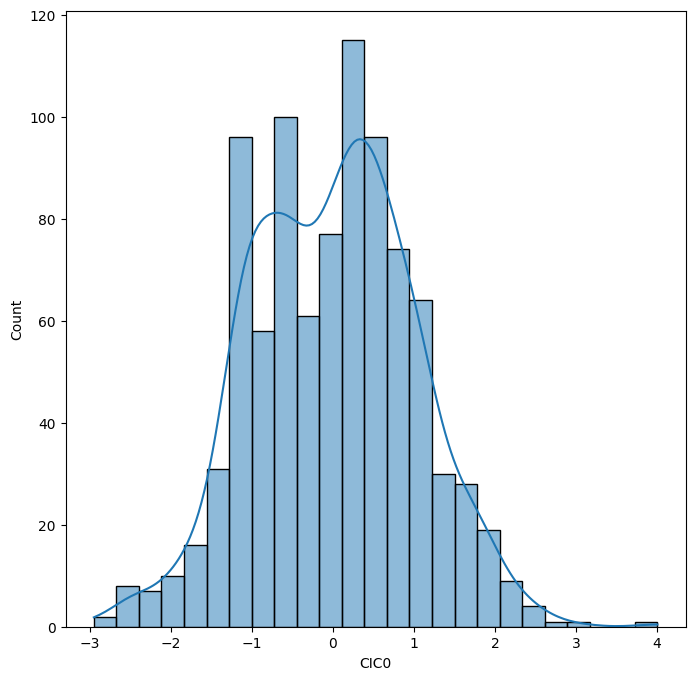

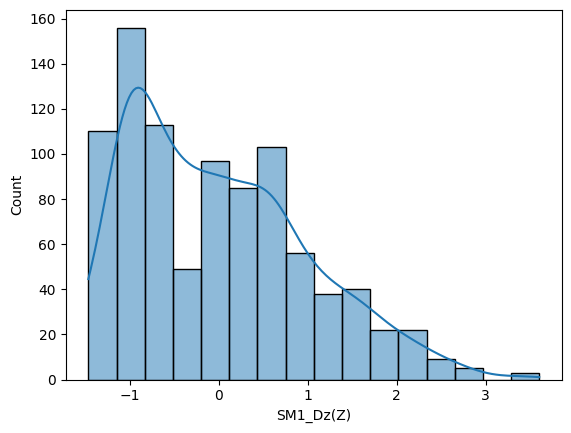

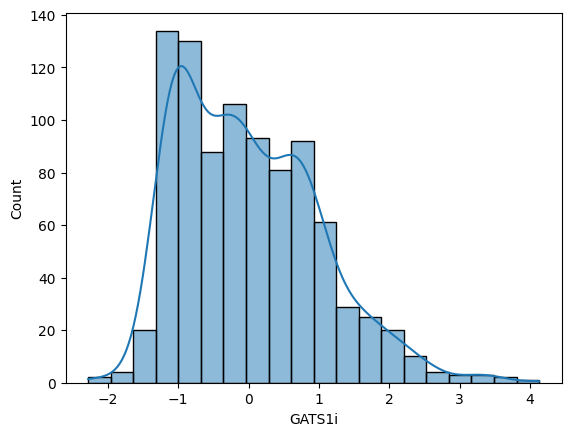

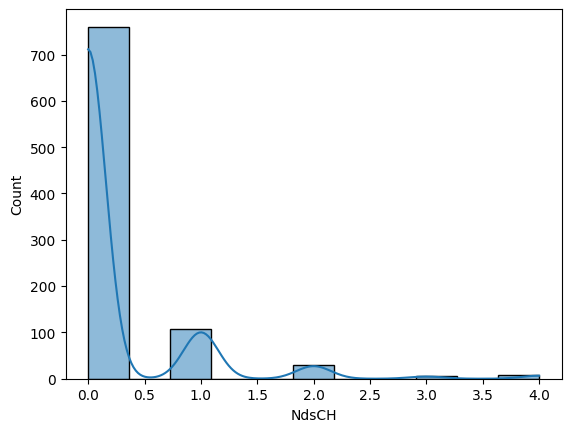

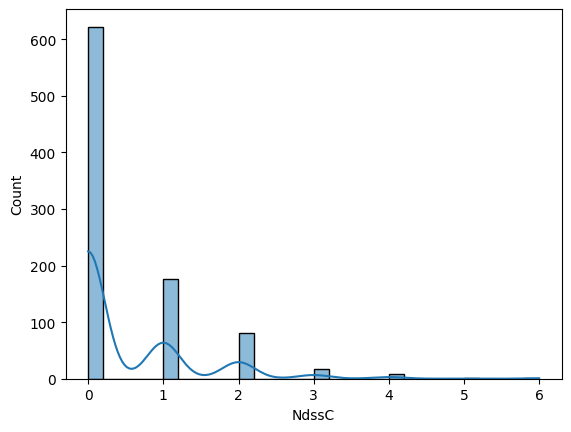

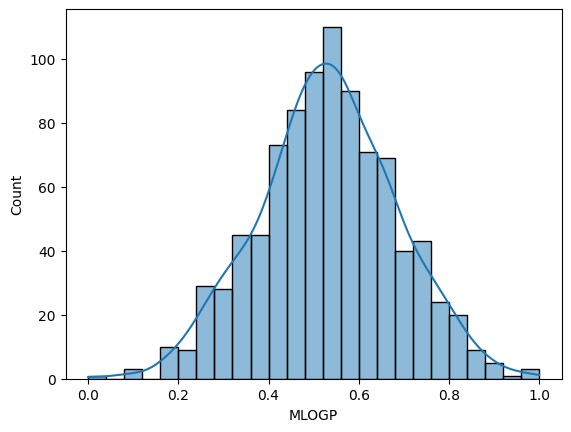

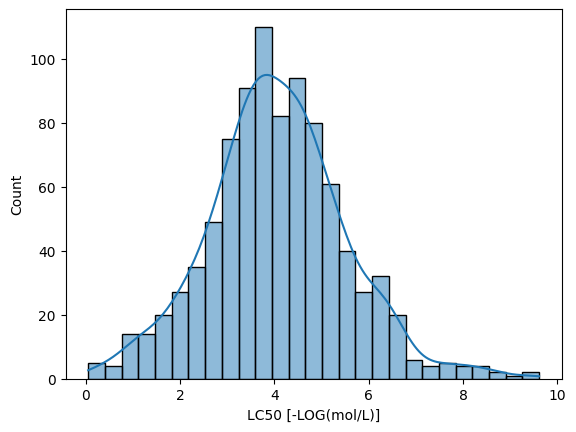

In [93]:
plt.figure(figsize=(8,8))
x=0
for i in df.columns:
    sns.histplot(data=new_df,x=i,kde=True)
    print('\n')
    plt.show()

In [83]:

new_df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,0.478873,0.468288,0.970369,0,1,0.461432,3.770
1,-0.938408,-0.113184,-1.092634,0,0,0.450261,3.115
2,-1.023101,0.022259,-1.173835,0,0,0.450261,3.531
3,0.170538,-0.694657,0.452715,1,0,0.499096,3.510
4,-1.064124,0.463618,-1.100247,0,0,0.507501,5.390


In [84]:
new_df.corr(method='pearson')

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
CIC0,1.000000,-0.235360,0.147622,0.121341,0.246639,0.463867,0.291854
SM1_Dz(Z),-0.235360,1.000000,-0.145967,-0.141401,0.163179,0.200663,0.410893
GATS1i,0.147622,-0.145967,1.000000,-0.010657,0.092410,-0.450739,-0.397965
NdsCH,0.121341,-0.141401,-0.010657,1.000000,0.188164,0.048620,0.172004
NdssC,0.246639,0.163179,0.092410,0.188164,1.000000,0.028499,0.172390
MLOGP,0.463867,0.200663,-0.450739,0.048620,0.028499,1.000000,0.651664
LC50 [-LOG(mol/L)],0.291854,0.410893,-0.397965,0.172004,0.172390,0.651664,1.000000


In [85]:
X, y = new_df.drop('LC50 [-LOG(mol/L)]', axis=1), df['LC50 [-LOG(mol/L)]']


In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [87]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [88]:
regression.coef_

array([ 0.3175846 ,  0.5640473 , -0.28003941,  0.39325626,  0.04777823,
        3.58325462])

In [89]:
regression.intercept_

2.0115883079147743

In [90]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [91]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 0.8458321632330442
MAE: 0.6288204862234535
R2 score 63.230461762803195


Lasso
Model Training Performance
RMSE: 1.396534214658578
MAE: 1.0556462230682704
R2 score -0.23581954185190046


Ridge
Model Training Performance
RMSE: 0.8490087874239384
MAE: 0.6302533780894859
R2 score 62.95375831360993


Elasticnet
Model Training Performance
RMSE: 1.3664257160965987
MAE: 1.0335162259227912
R2 score 4.039646590987633


